In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [20]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

This dataset contains several parameters which are considered important during the application for Masters Program Abroad. The parameters included are:

1. GRE scores (out of 340)
2. TOEFL scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose and Letter of Recommendation Strength (out of 5)
5. Undergraduate GPA (out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1)

It's a __Regression__ problem statement. We will prefer __Artificial Neural Network__ to solve this problem statement.

In [21]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df.shape

(500, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [24]:
df.duplicated().sum()
# There are 0 duplicate rows

0

In [25]:
df.drop(columns=['Serial No.'],
        inplace=True)

In [26]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


It's a common concept that when giving inputs to any neural network, we need to keep all the inputs in same scale. Here, 1st 7 columns will be the inputs and the last column "__Chance of Admit__" will be the output column. To scale this, we will be using __minmax__ scaling technique as we know the upper bounds of all the columns. For example GRE score can be 340 max to max, TOEFL score can be 120 max to max, and so on.

In [27]:
# Train test splitting
X = df.iloc[:,0:-1] # [All the rows, 0th column to -1th column]
y = df.iloc[:,-1] # [All the rows, -1th column i.e. target variable]

In [28]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [29]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [31]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


Here, we can see __20%__ rows have been stored in test data and __80%__ rows have been stored in training data.

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Creating object of MinMaxScaler class

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

Here, we can see that all the trainsing data has been scaled to similar values.

In [34]:
# Import dependencies to build our Neural Network Architecture
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [35]:
model = Sequential() # Creating Sequential object

model.add(Dense(7, 
                activation = 'relu', 
                input_dim = 7))
model.add(Dense(7, 
                activation = 'relu'))
model.add(Dense(1, 
                activation = 'linear'))

Remember one thing, in case of any __Regression__ problem, the output layer must contain __Linear__ activation function. 

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'Adam')

In [38]:
# Training the model
history = model.fit(X_train_scaled,
                    y_train,
                    epochs = 30,
                    validation_split = 0.2)

Epoch 1/30
10/10 [==============================] - 1s 29ms/step - loss: 0.2713 - val_loss: 0.1881
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 0.1395 - val_loss: 0.0817
Epoch 3/30
10/10 [==============================] - 0s 10ms/step - loss: 0.0581 - val_loss: 0.0323
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 0.0278 - val_loss: 0.0278
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 0.0255 - val_loss: 0.0291
Epoch 6/30
10/10 [==============================] - 0s 12ms/step - loss: 0.0234 - val_loss: 0.0248
Epoch 7/30
10/10 [==============================] - 0s 10ms/step - loss: 0.0205 - val_loss: 0.0212
Epoch 8/30
10/10 [==============================] - 0s 15ms/step - loss: 0.0190 - val_loss: 0.0197
Epoch 9/30
10/10 [==============================] - 0s 10ms/step - loss: 0.0175 - val_loss: 0.0188
Epoch 10/30
10/10 [==============================] - 0s 13ms/step - loss: 0.0165 - val_loss: 0.0182
Epoch 11/3

In [40]:
# We will predict by passing X_test_scaled data
y_pred = model.predict(X_test_scaled)

In [41]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6577822336299621

We are getting __65.78%__ accuracy in our model.

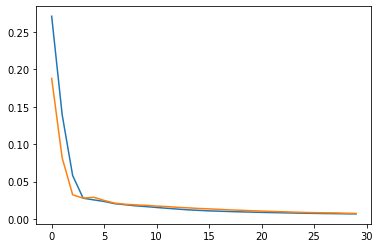

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()